In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
meeses = pd.merge(study_results,mouse_metadata, how= "left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
#meeses.value_counts(["Mouse ID"])
meeses.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#checking the number of mice
mousecnt = len(meeses["Mouse ID"].unique())
mousecnt

249

In [3]:
meeses[meeses.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
newmeeses = meeses.drop_duplicates(["Mouse ID","Timepoint"])
#newmeeses.value_counts(["Mouse ID"])
newmeeses.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
#check the number of mice
newmeeses.value_counts(["Mouse ID"])

Mouse ID
a203        10
l897        10
m546        10
m550        10
m601        10
            ..
x226         1
b447         1
f932         1
l872         1
n482         1
Length: 249, dtype: int64

In [6]:
groupedmeesesdrug = newmeeses.groupby("Drug Regimen")
avgoftumor= groupedmeesesdrug["Tumor Volume (mm3)"].mean()
medianoftumor = groupedmeesesdrug["Tumor Volume (mm3)"].median()
varianceoftumor = groupedmeesesdrug["Tumor Volume (mm3)"].var()
stdofvariance = groupedmeesesdrug["Tumor Volume (mm3)"].std()
groupdrug = pd.DataFrame({"Average": avgoftumor, "Median": medianoftumor, "Variance" : varianceoftumor, "Standard Deviation" : stdofvariance })
groupdrug

,Average,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [7]:
aggmeese = groupedmeesesdrug["Tumor Volume (mm3)"].agg(["mean", "median", "var","std","count"])
aggmeese.columns = ["Average", "Median", "Variance","Standard Deviation","count"]
aggmeese.reset_index(inplace=True)
aggmeese

,Drug Regimen,Average,Median,Variance,Standard Deviation,count
0,Capomulin,40.675741,41.557809,24.947764,4.994774,230
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,178
2,Infubinol,52.884795,51.820584,43.128684,6.567243,178
3,Ketapril,55.235638,53.698743,68.553577,8.279709,188
4,Naftisol,54.331565,52.509285,66.173479,8.134708,186
5,Placebo,54.033581,52.288934,61.168083,7.821003,181
6,Propriva,52.393463,50.909965,43.138803,6.568014,156
7,Ramicane,40.216745,40.673236,23.486704,4.846308,228
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,181
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,182


<AxesSubplot:xlabel='Drug Regimen'>

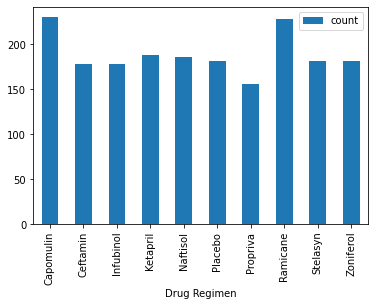

In [8]:
#using pandas
aggmeese.plot.bar(x ="Drug Regimen", y = "count")

<function matplotlib.pyplot.show(close=None, block=None)>

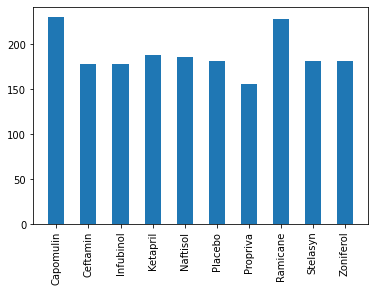

In [9]:
plt.bar(aggmeese["Drug Regimen"], aggmeese["count"], width=.5)
plt.xticks(rotation="vertical", )
plt.show

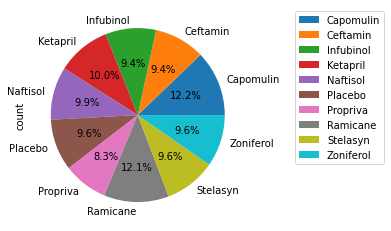

In [10]:
aggmeese.plot.pie(y = "count", labels = aggmeese["Drug Regimen"],autopct = "%.1f%%")
plt.legend(bbox_to_anchor=(1.2,1))

In [50]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = newmeeses.groupby(["Mouse ID","Sex"])
groupby_gender

mousegender = pd.DataFrame(groupby_gender.size())

gendercount = mouse_metadata.groupby("Sex").count()

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mousegender.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender




,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


(-1.1882449697294046,
 1.1132673136970537,
 -1.1151108406302452,
 1.2276484577192428)

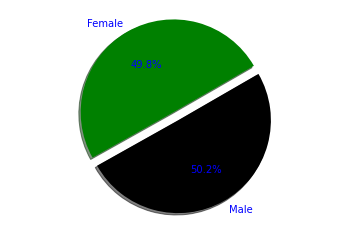

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#plot = name of the data frame .plot.pie (sumplots true)

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
##sizes = combined_df["Mouse ID"]

sizes = gendercount["Mouse ID"]

#Set colors for each section of the pie
colors = ['green', 'black']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes,colors=colors,labels = labels,explode=explode, shadow= True, startangle = 30,autopct="%1.1f%%",textprops={'color':"b"})


#Set equal axis
plt.axis("equal")

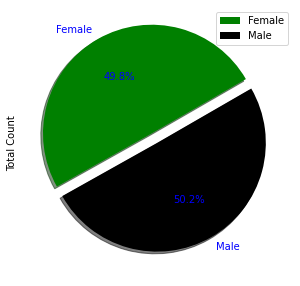

In [57]:
colors = ['green', 'black']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=30, explode = explode, shadow = True, autopct="%1.1f%%",textprops={'color':"b"})

In [62]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

purpledrank = meeses[meeses["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
purpledrank = purpledrank.sort_values(["Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
purpledrank_data = purpledrank[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

purpledrank_data.head()



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.0
221,Ceftamin,q483,0,45.0
220,Ceftamin,o287,0,45.0
219,Ceftamin,b487,0,45.0
218,Ceftamin,p438,0,45.0


In [64]:
purpledrank_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
purpledrank_sort.head()

# Turn retrieved data into dataframe to easily manipulate
purpledrank_df = purpledrank_sort.to_frame()
purpledrank_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


final_df = purpledrank_df.reset_index()
treatment_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# Put treatments into a list for for loop (and later for plot labels)
treatment_list_df = pd.DataFrame(treatment_lists)
treatment_list_df = treatment_list_df.reindex(top_4)
tumor_vols = [vol for vol in treatment_list_df['Tumor Volume (mm3)']]

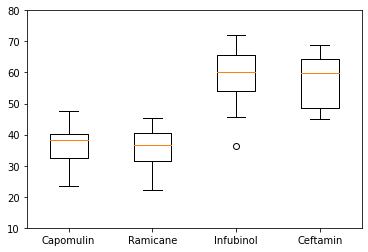

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

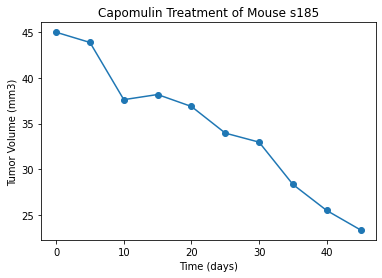

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
mouse = meeses.loc[meeses['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

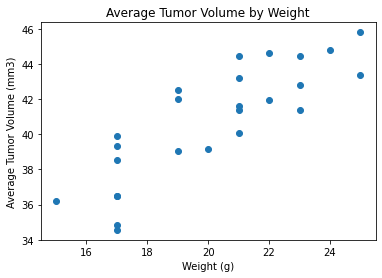

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = meeses.loc[meeses['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


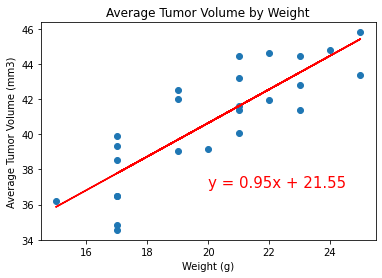

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = meeses.loc[meeses['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()